In [121]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [122]:
from scaling_lib.split_step_solver import BPMSplitStepSolver
from scaling_lib.helpers import gaussian
import scaling_lib.ftutils_torch as ftutils

# Main

In [192]:
# waveguide parameters
λ0 = 1.55 # free-space wavelength, all lengths are in um
k0 = 2*np.pi/λ0
neff = 1.8 # effective index of slab mode

# x-axis
Lx = 500 # width of simulation area in um (transverse dimension)
Nx = 2**9 # number of pixels in transverse dimensions
dx = Lx/(Nx-1) # stepsize in transverse dimension
x_axis = ftutils.ft_t_axis(Nx, dx)

# z-axis
dz = 10. # propagation step in z-direction in um
Lz = 10000 # length of device in propagation-direction in um
Nz = int(np.floor(Lz/dz))
z_axis = (torch.arange(Nz)+1)*dz

In [193]:
# Set up the split step solver which will integrate the PDE
bpmsolver = BPMSplitStepSolver(x_axis, z_axis, neff)

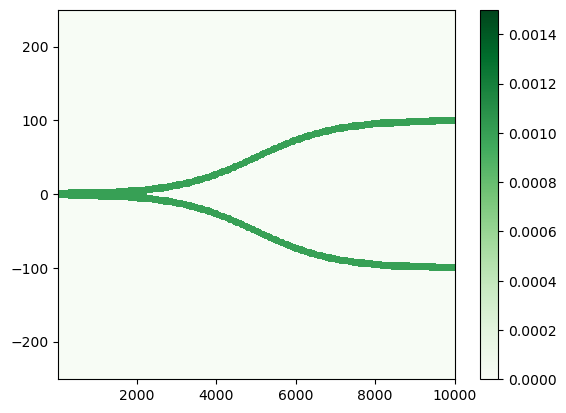

In [188]:
deflection = 100
scale = 1000
wg_radius = 5
dn_prog[torch.abs( xx - deflection * torch.sigmoid((zz - Lz/2)/scale) ) < wg_radius] = 1e-3
dn_prog[torch.abs( xx + deflection * torch.sigmoid((zz - Lz/2)/scale) ) < wg_radius] = 1e-3

plt.pcolormesh(z_axis, x_axis, dn_prog, cmap = 'Greens', vmin = 0, vmax = 1.5e-3)
plt.colorbar()

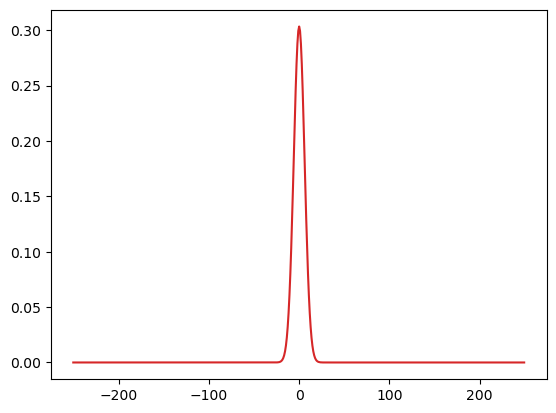

In [189]:
mode = gaussian(x_axis, mu = 0, sigma = 6)
plt.plot(x_axis, mode, c='tab:red')

In [190]:
E_out = bpmsolver.run_simulation(torch.vstack([mode]), dn_prog.T, monitor=True)

Text(0.5, 1.0, 'Intensity distribution of Gaussian beam propagating through Y-splitter')

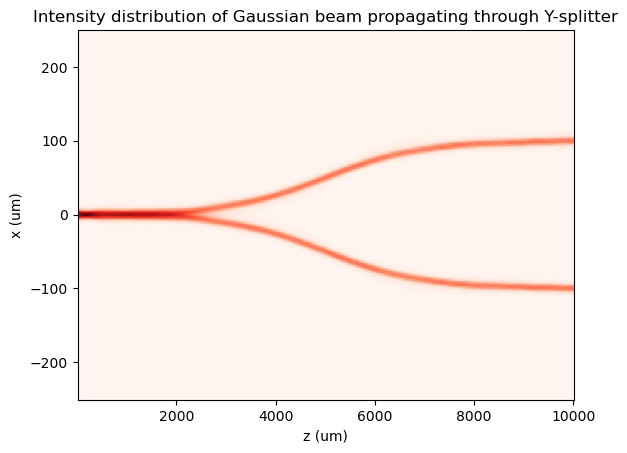

In [191]:
ind_mode = 0
plt.pcolormesh(z_axis, x_axis, bpmsolver.Emat_x[:,ind_mode].abs().square().T, cmap = 'Reds')
plt.xlabel('z (um)')
plt.ylabel('x (um)')
plt.title(f'Intensity distribution of Gaussian beam propagating through Y-splitter')